In [1]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /Users/seop/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [2]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /Users/seop/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [3]:
nltk.download('omw-1.4')

[nltk_data] Downloading package omw-1.4 to /Users/seop/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [4]:
import numpy as np
import pandas as pd

import re
import string
from nltk.stem import WordNetLemmatizer, PorterStemmer
from nltk.corpus import stopwords
from nltk.tokenize import RegexpTokenizer
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation

from warnings import filterwarnings
filterwarnings('ignore')

In [5]:
df = pd.read_csv('수작업할거야그냥.csv').drop('Unnamed: 0',axis=1)
df = df.drop_duplicates().reset_index(drop=True)

In [6]:
df.drop_duplicates()

,DESC_DEFECT
0,these seat belt assemblies were manufactured ...
1,there may be an intermittent fault in the dr...
2,the sensor designed to detect vehicle roll c...
3,one or more rivets that attach the airbag mo...
4,the driver side frontal airbag has a shortin...
...,...
119,the strength of the driver-side airbag cover...
120,the score line on the passenger airbag may ...
121,an improperly crimped clamp may allow the si...
122,the airbag control unit (acu) cover may cont...


In [68]:
stop_words = ['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each',
 'few',
 'more',
 'most',
 'other',
 'some',
 'such',
  'only',
 'own',
 'same',
 'so',
 'than',
 'too',
 'very',
 's',
 't',
 'can',
 'will',
 'just',
 'don',
 'should',
 "should've",
 'now',
 'd',
 'll',
 'm',
 'o',
 're',
 've',
 'y',
 'ain',
 'aren',
 "aren't",
 'couldn',
 "couldn't",
 'didn',
 'doesn',
 'hadn',
 'hasn',
 "hasn't",
 'haven',
 'isn',
 'ma',
 'mightn',
 "mightn't",
 'mustn',
 "mustn't",
 'needn',
 'shan',
 "shan't",
 'shouldn',
 "shouldn't",
 'wasn',
 'won',
 'air',
 'bags',
'knee'
 'bag',
 'nor',
'vehicles',
'vehicle',
 'contact',
 'driver',
 'own',
 'owns',
 'driving',
 'recall',
 'vehicle',
 'takata',
 'airbag',
 'airbags',
 'personal',
 'serious',
 'volvo',
 'note',
 'general',
 'issue',
 'problem',
 'passenger',
 'accident',
 'mileage',
 'service',
 'part',
 'nhtsa',
 'ford',
 'honda',
 'hyundai',
 'kia',
 'year',
 'years',
 'nissan',
 'may',
 'audi',
 'orc',
 'mdx',
 '₩',
 'ohio',
 'oklahoma',
 'west',
 'prsche',
 'follows',
 'comply',
 'cause','could','causing','become','recalling','affected','child','due']


In [69]:
import string 

remove_punct_dict = dict((ord(punct),None) for punct in string.punctuation)
lemmar = WordNetLemmatizer()

def LemToken(tokens):
    
    return [lemmar.lemmatize(token) for token in tokens]

def LemNormalize(text):
    return LemToken(nltk.word_tokenize(text.lower().translate(remove_punct_dict)))

In [70]:
temp = df

In [71]:
import time 

lemmatizer = WordNetLemmatizer()
stemmer = PorterStemmer() 
def clean(doc):
    sentence=str(doc)
    sentence = sentence.lower()
    sentence=sentence.replace('{html}',"") 
    cleanr = re.compile('<.*?>')
    cleantext = re.sub(cleanr, '', sentence)
    rem_url=re.sub(r'http\S+', '',cleantext)
    rem_num = re.sub('[0-9]+', '', rem_url)
    tokenizer = RegexpTokenizer(r'\w+')
    tokens = tokenizer.tokenize(rem_num)
    filtered_words = [w for w in tokens if len(w) > 2 if not w in stop_words]
    stem_words=[stemmer.stem(w) for w in filtered_words]
    lemma_words=[lemmatizer.lemmatize(w) for w in stem_words]  
    return " ".join(filtered_words)
start = time.time()
clean_corpus = [clean(doc).split() for doc in temp['DESC_DEFECT']]
print(time.time() - start)

0.063507080078125


In [72]:
new_clean_corpus = []
for i in clean_corpus:
    i = ' '.join(i)
    i = i.replace('deploying','deploy').replace('deployment','deploy')
    i = i.replace('frontal','front').replace('improperly','improper').replace('incorrectly','incorrect')
    
    i = i.replace('seats','seat').replace('sensors','sensor').replace('manufacturing','manufacture')
    i = i.replace('inflator','inflate').replace('manufactured','manufacture')

    new_clean_corpus.append(i)
    
    


In [73]:
new_clean_corpus

['seat belt assemblies manufacture without lap portion lockable secure safety seat',
 'intermittent fault clockspring wiring connector supplemental restraint system',
 'sensor designed detect roll malfunction inadvertent deploy protection system',
 'one rivets attach module cover missing',
 'side front shorting bar intermittently terminals',
 'cable occupant classification system ocs damaged sliding seat forward backward',
 'built incorrect occupant restraint control module',
 'side curtain not deploy event side impact collision front seat empty although side curtain system designed suppress side curtain',
 'circuits control module aps short inadvertent deploy',
 'improper sized terminal crimps seat side wiring harness seat side malfunction illuminate warning light',
 'side front shorting bar intermittently terminals',
 'second stage dual stage not inflate severe front impact',
 'sensor within occupant detection system ods manufacture specification system malfunction permanently suppre

In [74]:
from sklearn.feature_extraction.text import CountVectorizer
countv = CountVectorizer(
                         min_df=5 # 최소 단어 등장 횟수
                        ,stop_words = stop_words
                        ,ngram_range=(1, 2)
                        )
sp_mat = countv.fit_transform(new_clean_corpus)


# 희소행렬을 np array로
count_df = pd.DataFrame(sp_mat.toarray(),columns = countv.get_feature_names())
count_df



,belt,belt pretensioners,circuit,classification,classification system,control,control module,control unit,controller,correctly,...,supplemental restraint,system,system ocs,system srs,unit,unit ecu,warning,wiring,within,without
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,0,0,0,0,0,0,0,0,0,0,...,1,1,0,0,0,0,0,1,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
120,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
121,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
122,0,0,3,0,0,1,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0


In [75]:
for i in range(len(count_df)):
    for col in count_df.columns:
        if count_df.loc[i,col] >1:
            count_df.loc[i,col] =1

In [76]:
test = count_df.copy()

In [77]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

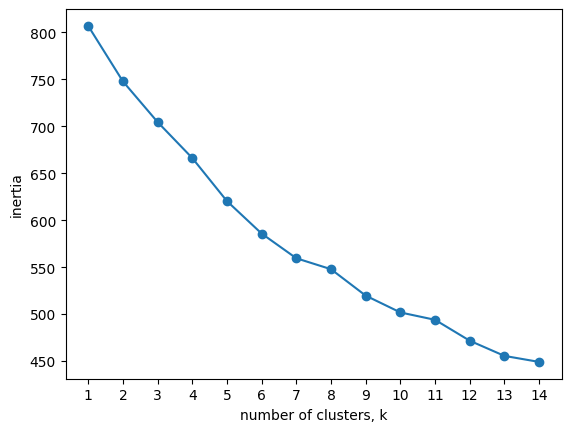

In [93]:
ks = range(1,15)

inertias = []

for k in ks:
    model = KMeans(n_clusters=k,random_state=0,max_iter=1000)
    model.fit(count_df) # tsne한 놈
    inertias.append(model.inertia_)
# Plot ks vs inertias
plt.plot(ks, inertias, '-o')
plt.xlabel('number of clusters, k')
plt.ylabel('inertia')
plt.xticks(ks)
plt.show()

In [39]:
m = TSNE(learning_rate = 1000,random_state=0,n_components=2)
tsne_features = m.fit_transform(test)

In [40]:
df_tsne = pd.DataFrame()
df_tsne['x'] = tsne_features[:,0]
df_tsne['y'] = tsne_features[:,1]
# df_tsne['z'] = tsne_features[:,2]

In [41]:
test

,belt,belt pretensioners,circuit,classification,classification system,control,control module,control unit,controller,correctly,...,supplemental restraint,system,system ocs,system srs,unit,unit ecu,warning,wiring,within,without
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,0,0,0,0,0,0,0,0,0,0,...,1,1,0,0,0,0,0,1,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
120,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
121,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
122,0,0,1,0,0,1,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0


In [42]:
import seaborn as sns

In [95]:
from sklearn.cluster import KMeans
kn =6
cluster_model = KMeans(n_clusters=kn,max_iter=1000,random_state = 0)
cluster_model.fit(test)

cluster_label = cluster_model.labels_
cluster_centers = cluster_model.cluster_centers_
# test['cluster_label'] = cluster_label

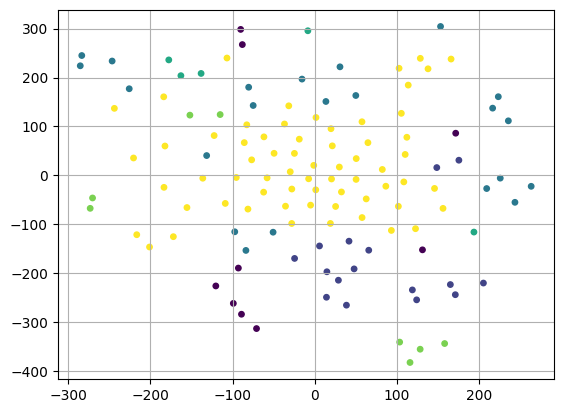

In [96]:
plt.scatter(np.array(tsne_features)[:,0], np.array(tsne_features)[:,1], c=cluster_label, s=15, cmap='viridis')
centers = cluster_model.cluster_centers_
plt.grid()
plt.show()

In [85]:
temp['cluster_label'] = cluster_label

In [86]:
# fig = plt.figure(figsize=(6, 6))
# ax = fig.add_subplot(111, projection='3d')
# ax.scatter(df_tsne['x'], df_tsne['y'], df_tsne['z'], marker='o', s=15,c= cluster_label)

In [87]:
cluster_centers = cluster_model.cluster_centers_


def get_cluster_details(cluster_model,cluster_data,feature_names,clusters_num,top_n_features=10):
    
    cluster_details = {}
    #군집 중심점 별 할당된 워드 피처들의 거리값이 큰 순으로 구하기 위함.
    centroid_feature_ordered_ind = cluster_model.cluster_centers_.argsort()[:,::-1]
    
    for cluster_num in range(clusters_num):
        cluster_details[cluster_num] = {}
        cluster_details[cluster_num]['cluster'] = cluster_num
        
        top_feature_indexes = centroid_feature_ordered_ind[cluster_num,:top_n_features]
        top_features = [feature_names[ind] for ind in top_feature_indexes]
        
        top_feature_values = cluster_model.cluster_centers_[cluster_num,top_feature_indexes].tolist()
        
        cluster_details[cluster_num]['top_features'] = top_features
        cluster_details[cluster_num]['top_features_value'] = top_feature_values
        

    return cluster_details
        
def print_cluster_details(cluster_details):
    for cluster_num,cluster_detail in cluster_details.items():
        print('###### Cluster {0}'.format(cluster_num))
        print('Top features : ',cluster_detail['top_features'])
        

In [88]:
countv.get_feature_names()

['belt',
 'belt pretensioners',
 'circuit',
 'classification',
 'classification system',
 'control',
 'control module',
 'control unit',
 'controller',
 'correctly',
 'cover',
 'crash',
 'curtain',
 'cushion',
 'damaged',
 'deploy',
 'deploy crash',
 'deploy event',
 'detach',
 'disabled',
 'ecu',
 'electrical',
 'electronic',
 'electronic control',
 'error',
 'event',
 'event crash',
 'fail',
 'front',
 'front seat',
 'front side',
 'head',
 'impact',
 'improper',
 'incorrect',
 'inflate',
 'initiators',
 'instrument',
 'instrument panel',
 'internal',
 'malfunction',
 'manufacture',
 'module',
 'mounted',
 'mounted side',
 'not',
 'not deploy',
 'not properly',
 'occupant',
 'occupant classification',
 'occupant restraint',
 'ocs',
 'panel',
 'possibly',
 'pretensioners',
 'preventing',
 'properly',
 'protection',
 'restraint',
 'restraint control',
 'restraint controller',
 'restraint system',
 'seat',
 'seat belt',
 'seat mounted',
 'sensor',
 'short',
 'side',
 'side curtain',
 's

In [89]:
feature_names = countv.get_feature_names()
cluster_details = get_cluster_details(cluster_model = cluster_model,cluster_data= temp,
                                     feature_names = feature_names,clusters_num=kn,top_n_features=15)

In [90]:
print_cluster_details(cluster_details)

###### Cluster 0
Top features :  ['deploy', 'event', 'crash', 'not', 'side', 'event crash', 'front', 'improper', 'inflate', 'curtain', 'side curtain', 'deploy event', 'seat', 'manufacture', 'impact']
###### Cluster 1
Top features :  ['seat', 'front', 'front seat', 'occupant', 'mounted', 'fail', 'side', 'crash', 'system', 'ocs', 'occupant classification', 'system ocs', 'classification system', 'classification', 'deploy']
###### Cluster 2
Top features :  ['not', 'deploy', 'incorrect', 'manufacture', 'control', 'module', 'front', 'side', 'restraint', 'system', 'sensor', 'occupant', 'control module', 'seat', 'properly']
###### Cluster 3
Top features :  ['restraint', 'srs', 'restraint system', 'system srs', 'system', 'supplemental restraint', 'supplemental', 'crash', 'unit', 'control unit', 'control', 'deploy', 'error', 'ecu', 'electronic control']
###### Cluster 4
Top features :  ['seat', 'belt', 'seat belt', 'belt pretensioners', 'pretensioners', 'deploy', 'occupant', 'crash', 'event', 'c

In [91]:
test

,belt,belt pretensioners,circuit,classification,classification system,control,control module,control unit,controller,correctly,...,supplemental restraint,system,system ocs,system srs,unit,unit ecu,warning,wiring,within,without
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,0,0,0,0,0,0,0,0,0,0,...,1,1,0,0,0,0,0,1,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
120,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
121,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
122,0,0,1,0,0,1,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0


In [92]:
for i in range(kn):
    t = temp[temp['cluster_label']==i]
    t.to_csv(f'airbag_cluster_ngram_random42_{i}.csv')

In [56]:
temp

,DESC_DEFECT,cluster_label
0,these seat belt assemblies were manufactured ...,3
1,there may be an intermittent fault in the dr...,9
2,the sensor designed to detect vehicle roll c...,9
3,one or more rivets that attach the airbag mo...,3
4,the driver side frontal airbag has a shortin...,3
...,...,...
119,the strength of the driver-side airbag cover...,3
120,the score line on the passenger airbag may ...,3
121,an improperly crimped clamp may allow the si...,8
122,the airbag control unit (acu) cover may cont...,5


In [207]:
r

NameError: name 'r' is not defined

In [208]:
predict.value_counts()

NameError: name 'predict' is not defined

# DBSCAN

In [388]:
a.drop_duplicates(subset=['CDESCR'],inplace=True)

In [389]:
a[a['label'] == 0].to_csv('비교0.csv')
a[a['label'] == 1].to_csv('비교1.csv')


In [383]:
a['label'].value_counts()

0    6590
1     139
Name: label, dtype: int64

In [382]:
a = a[a['COMPNAME']=='AIR BAGS']

In [381]:
a['label'].value_counts()

0    54975
1     1807
Name: label, dtype: int64

In [380]:
a = df[df['CDESCR'].str.contains('THE CONTACT')==True]

In [379]:
df = df[df['YEAR']>2011]

In [154]:
for i in corpus:
    if len(i)==0:
        print(i)

In [152]:
nan_list = [idx for idx,i in enumerate(corpus) if len(i)==0]
corpus = [i for i in corpus if len(i)>0]
temp_5.drop(nan_list,inplace=True)

In [151]:
temp_5.reset_index(drop=True,inplace=True)

In [186]:
from gensim import corpora
dictionary = corpora.Dictionary(clean_corpus)
corpus = [dictionary.doc2bow(text) for text in clean_corpus]

TypeError: doc2bow expects an array of unicode tokens on input, not a single string

In [187]:
clean_corpus

[' while driving at  mph  entering a parking space the vehicle abnormally accelerated  the contact attempted to brake and the vehicle began to skid  the vehicle jumped a curved and crashed into another parked vehicle  the drivers side of the contacts vehicle sustained substantial damage  the air bags did not deploy although there were no injuries reported  a police report was available  the vehicle was taken to a local body repair facility where the contact was awaiting repairs  the vin was not available  the approximate failure and current mileage was  ',
 ' this is repeatable  often when my passenger  lbs  tall sits in the passenger seat the airbag remains in the off position as if no one is sitting in that seat  ive noticed that when the passenger sits and puts their feet directly on the floor the passengers knees and upper thigh right above the knee do not make contact with the seat  when sitting in this position the airbag will remain in the off position  when the passenger sits w

In [295]:
from gensim.models.coherencemodel import CoherenceModel

In [294]:
tf_idf_arr

<30538x85 sparse matrix of type '<class 'numpy.float64'>'
	with 321892 stored elements in Compressed Sparse Row format>

In [325]:
vocab_cv = cv_vectorizer.get_feature_names()
vocab_cv

[' ',
 'a',
 'b',
 'c',
 'd',
 'e',
 'f',
 'g',
 'h',
 'i',
 'j',
 'k',
 'l',
 'm',
 'n',
 'o',
 'p',
 'q',
 'r',
 's',
 't',
 'u',
 'v',
 'w',
 'x',
 'y',
 'z']

In [353]:
for i in range(10):
    temp_5[temp_5['cluster_label'] == i].to_excel(f'label_0_cluster{i}.xlsx')